In [2]:
import pandas as pd
import numpy as np
from numpy import polyfit
from _GraphUtils import *
import matplotlib.pyplot as plt

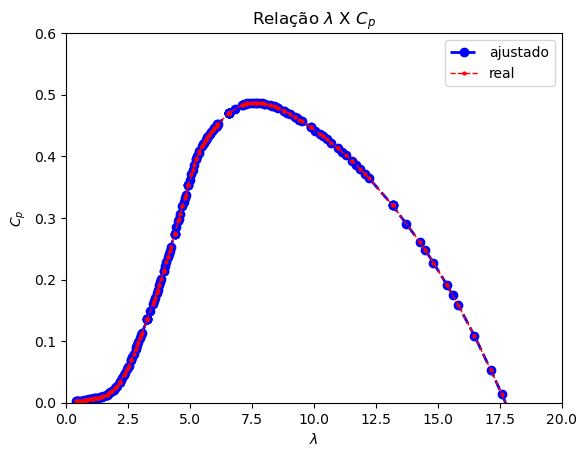

In [3]:
path = r'C:\ControleRobustoArtigo\Datasets\CpVersusTSR&Pitch_WT_Perf_V1.csv'
df = pd.read_csv(path,header=None)
x = df.iloc[:,0].values
y = [df.iloc[:,i+6].values for i in range(6)]
ymax = [np.max(df.iloc[:,i+6].values) for i in range(6)]
x_max = [np.where(df.iloc[:,i+6].values==np.max(df.iloc[:,i+6].values)) for i in range(6)]

y1 = y[0].copy()

coeffs = polyfit(x, y1, 5)

y_ = y[0].copy()
y_new = [y_[0]]
x_new = [x[0]]
for i in range(1,len(y_)):
    if y_[i-1] != y_[i]:
        y_new.append(y_[i])
        x_new.append(x[i])
    if y_[i-1] == y_[i]:
        y_new.append((y_[i]+y_[i+1])*0.5)
        x_new.append((x[i]+x[i+1])*0.5)

df = pd.DataFrame()
df['lambda'] = x_new
df['cp'] = y_new
df.to_csv('Cp_X_lambda.csv', index=False)

plt.plot(x_new,y_new,label='ajustado',linestyle='--',linewidth=2,marker='o',color='blue')
plt.plot(x,y_,label='real',linestyle='--',linewidth=1,marker='o',markersize=2,color='red')
plt.xlim(0, 20)
plt.ylim(0, 0.6)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$C_p$')
plt.title(r'Relação $\lambda$ X $C_p$')
plt.legend()
plt.show()

In [4]:
PlotSeries(y_arrays=[y_new,y_],x_arrays=[x_new,x])

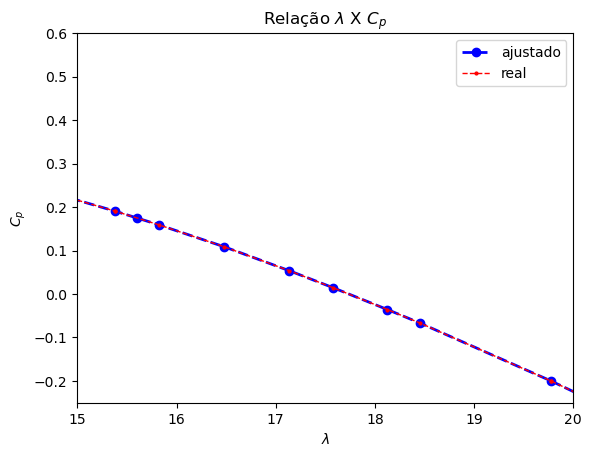

In [13]:
plt.plot(x_new,y_new,label='ajustado',linestyle='--',linewidth=2,marker='o',color='blue')
plt.plot(x,y_,label='real',linestyle='--',linewidth=1,marker='o',markersize=2,color='red')
plt.xlim(15, 20)
plt.ylim(-0.25, 0.6)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$C_p$')
plt.title(r'Relação $\lambda$ X $C_p$')
plt.legend()
plt.show()

0.4867


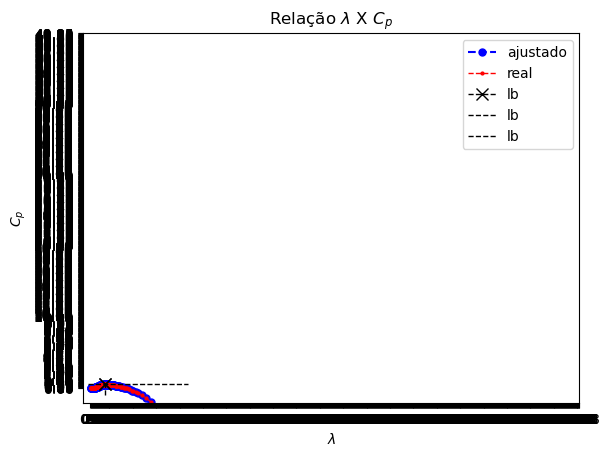

In [8]:
def Cp_calc(lmbd_in=0):
    path = 'Cp_X_lambda.csv'
    df = pd.read_csv(path)
    dist = np.abs(df['lambda'].values - lmbd_in)

    return (df['cp'].values[np.argmin(dist)])

lb = 7.6
cp = Cp_calc(lb)
print(cp)
plt.plot(x_new,y_new,label='ajustado',linestyle='--',linewidth=1.5,marker='o',markersize=5,color='blue')
plt.plot(x,y_,label='real',linestyle='--',linewidth=1,marker='o',markersize=2,color='red')
plt.plot([lb,lb],[cp,cp],label='lb',linestyle='--',linewidth=1,marker='x',markersize=8,color='black')
plt.plot([lb,lb],[-1,1],label='lb',linestyle='--',linewidth=1,color='black')
plt.plot([-1,50],[cp,cp],label='lb',linestyle='--',linewidth=1,color='black')

plt.xticks([i*0.25 for i in range(1000)])
plt.yticks([i*0.05 for i in range(1000)])
#plt.xlim(4, 7)
#plt.ylim(0, 0.6)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$C_p$')
plt.title(r'Relação $\lambda$ X $C_p$')
plt.legend()
plt.show()